In [1]:
!nvidia-smi

Fri Dec  8 07:28:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install ultralytics

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.4/78.2 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.20GHz
CUDA                11.8

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source="https://img.freepik.com/free-photo/medium-shot-happy-man-holding-map_23-2148765207.jpg"

/content
100% 49.7M/49.7M [00:00<00:00, 106MB/s]
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

100% 46.7k/46.7k [00:00<00:00, 7.34MB/s]
image 1/1 /content/medium-shot-happy-man-holding-map_23-2148765207.jpg: 384x640 1 person, 1 dog, 2 backpacks, 181.6ms
Speed: 12.9ms preprocess, 181.6ms inference, 23.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


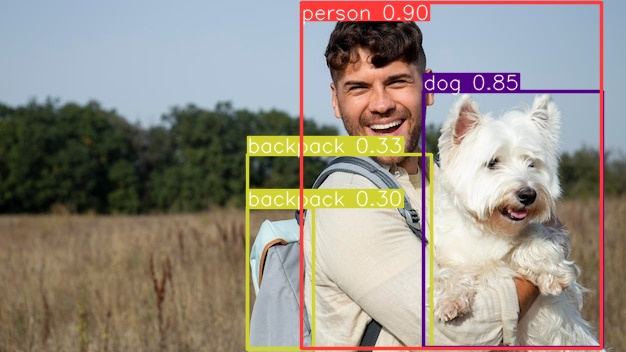

In [6]:
%cd {HOME}
Image(filename='/content/runs/detect/predict/medium-shot-happy-man-holding-map_23-2148765207.jpg', height=400)

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="SNlIdda6Dfgb5OXXmkwd")
project = rf.workspace("smart-traffic-lights").project("vehicle-detection-gwemc")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.225, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to vehicle-detection-1 in yolov8:: 100%|██████████| 6870/6870 [00:01<00:00, 4401.56it/s]


In [6]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [8]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [9]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: shirshaktiwari2021 (trafficmanagement). Use `wandb login --relogin` to force relogin


acc,▁▄▆▆▇█▇█
loss,█▅▃▁▂▁▂▁
acc,0.86859
loss,0.15619


In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

/content
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/vehicle-detection-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

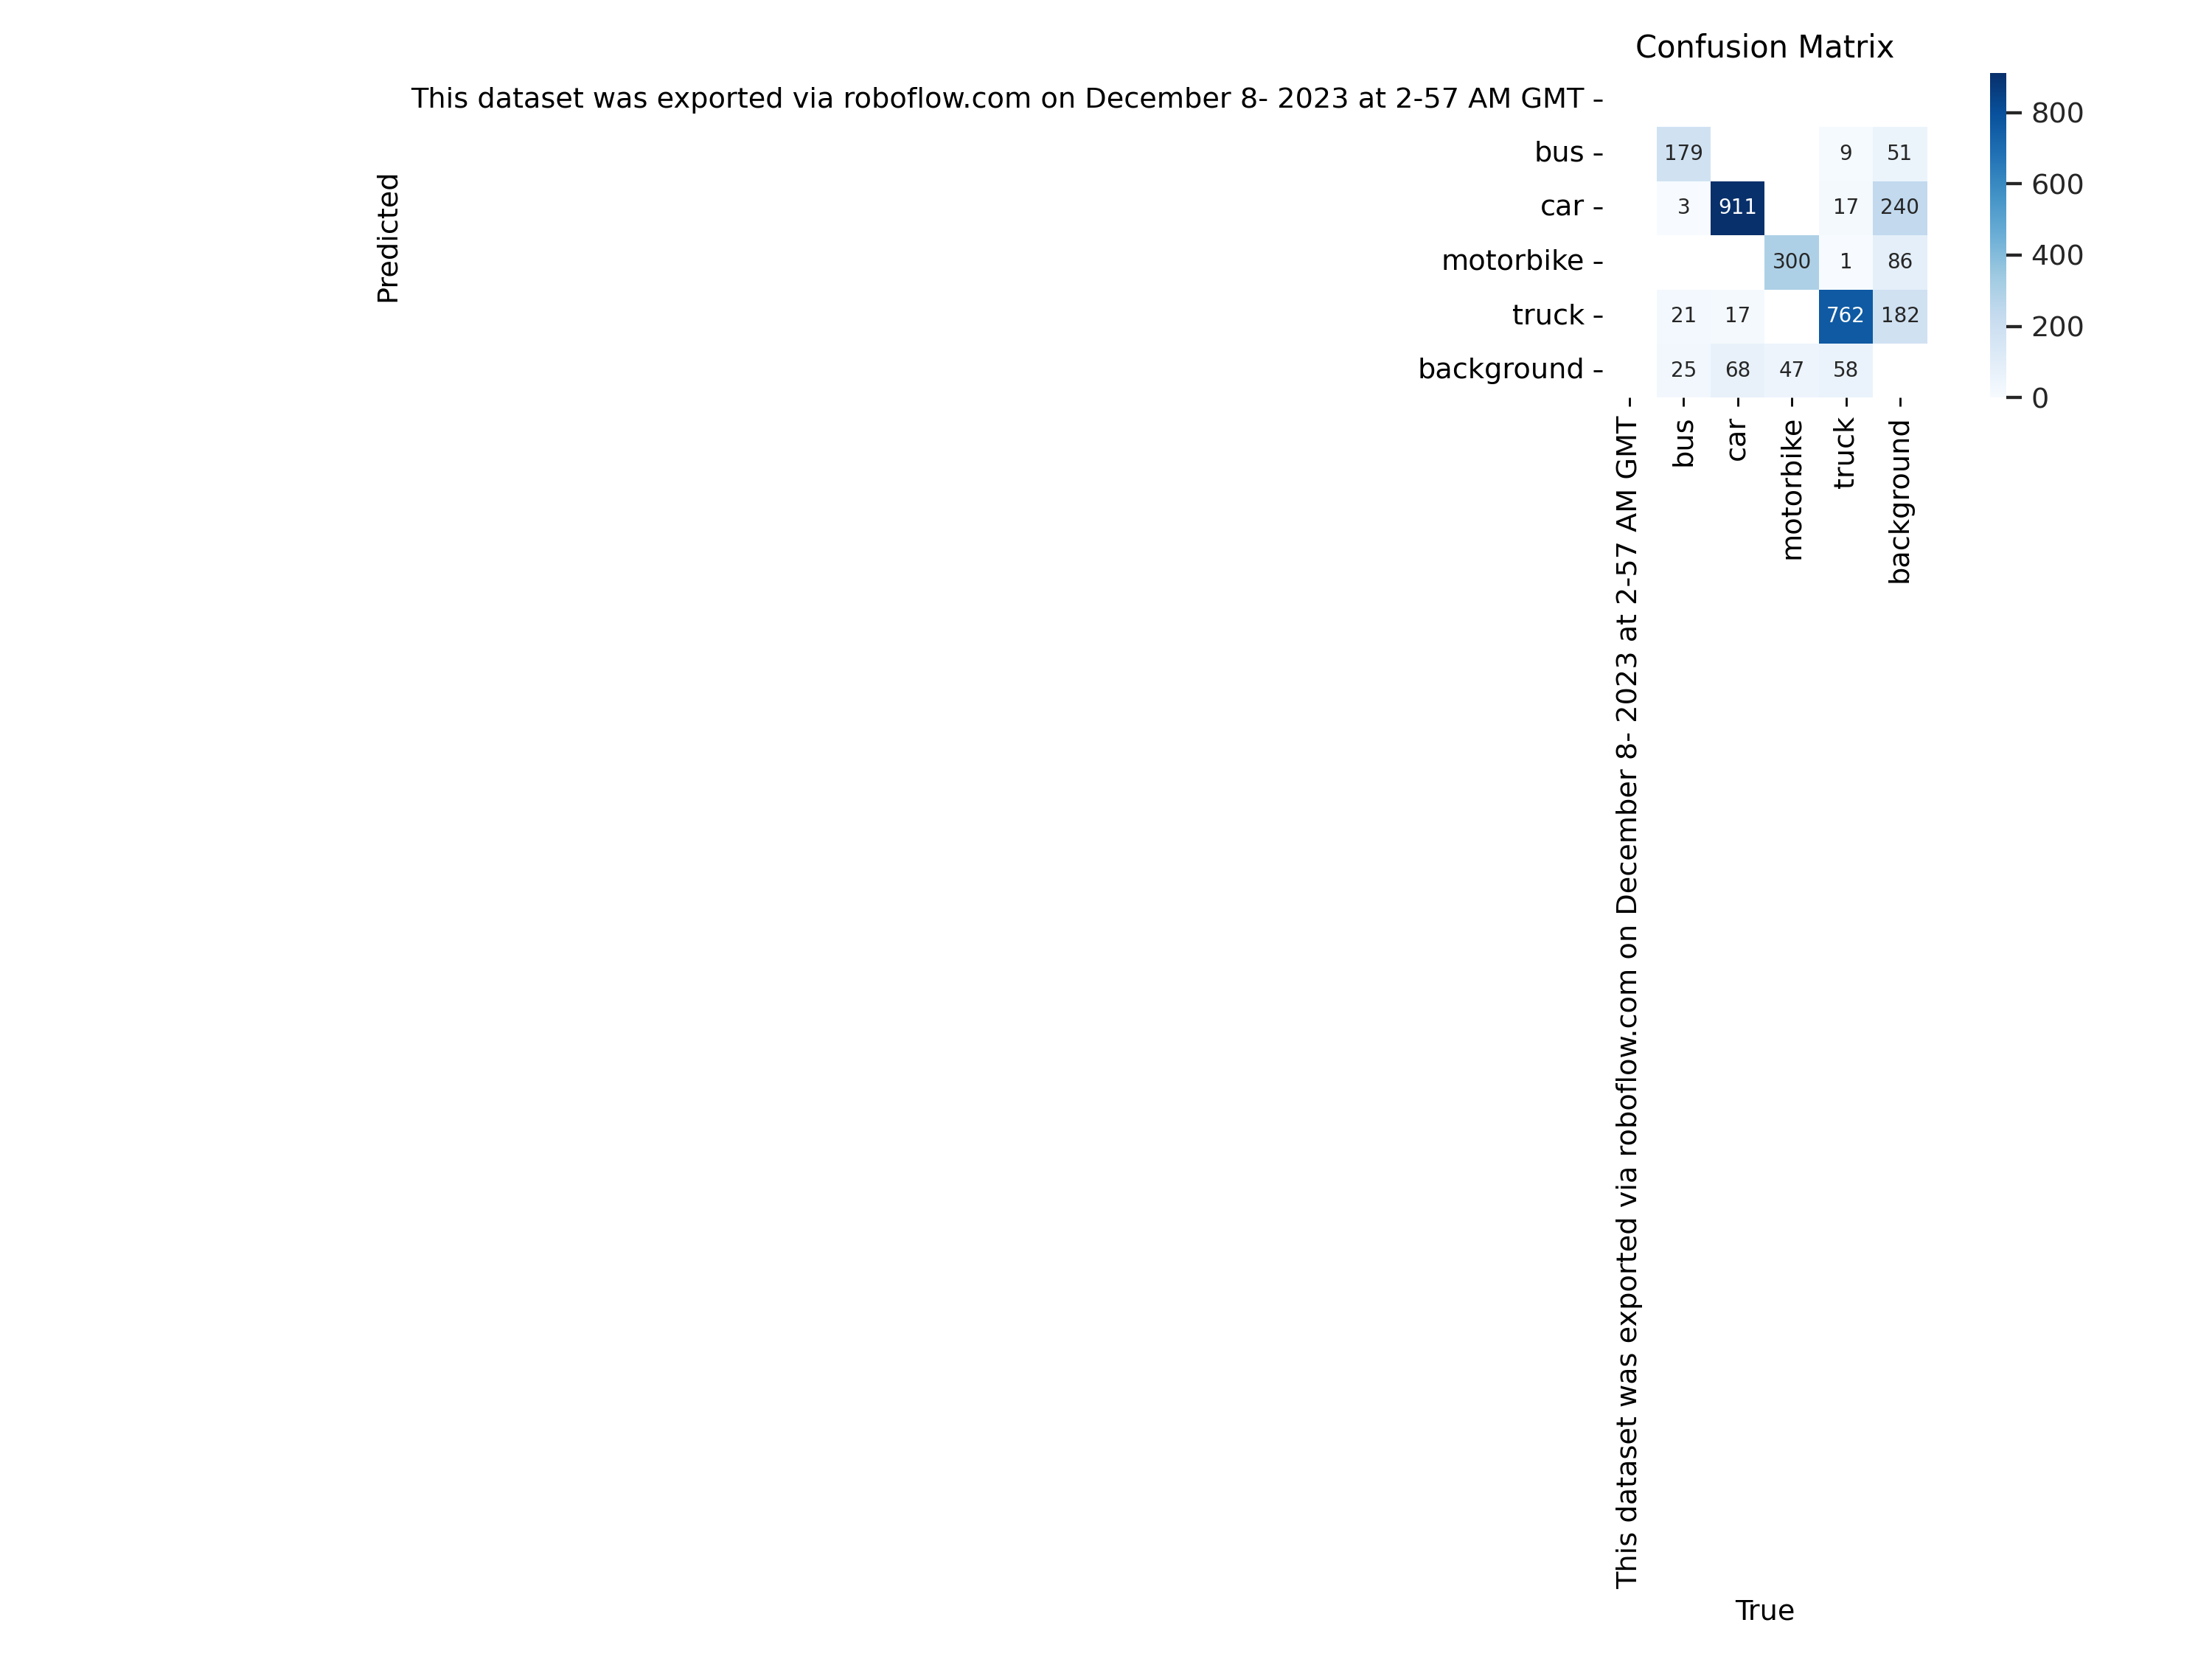

In [11]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

In [12]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/vehicle-detection-1/valid/labels.cache... 410 images, 0 backgrounds, 0 corrupt: 100% 410/410 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:15<00:00,  1.67it/s]
                   all        410       2418      0.806       0.85      0.889      0.644
                   bus        410        228      0.799      0.798      0.835      0.648
                   car        410        996      0.807      0.899      0.916      0.698
             motorbike        410        347      0.806      0.816      0.894      0.543
                 truck        410        847       0.81      0.886      0.911      0.688
Speed: 1.7ms preprocess, 20.4ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn mor

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

image 1/225 /content/vehicle-detection-1/test/images/video_mp4-100_jpg.rf.afe61c76ff9bc1529c9b0579cd155777.jpg: 640x640 1 bus, 2 cars, 2 motorbikes, 2 trucks, 37.3ms
image 2/225 /content/vehicle-detection-1/test/images/video_mp4-1036_jpg.rf.62108d1250f924bdcb42372d73504784.jpg: 640x640 6 cars, 2 motorbikes, 1 truck, 37.1ms
image 3/225 /content/vehicle-detection-1/test/images/video_mp4-1042_jpg.rf.d235b1baf9661cc907a66016158f5b6a.jpg: 640x640 1 bus, 4 cars, 1 motorbike, 37.0ms
image 4/225 /content/vehicle-detection-1/test/images/video_mp4-1057_jpg.rf.33e1c24dc63bb2562bc9b07eba7bdcf3.jpg: 640x640 1 bus, 2 cars, 1 truck, 37.0ms
image 5/225 /content/vehicle-detection-1/test/images/video_mp4-105_jpg.rf.491ed8e6927f820a79bdc471bd3e44da.jpg: 640x640 1 car, 2 motorbikes, 3 trucks, 27.8ms
image 6/225 /content/vehicle-d

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/trained_model/prithvi-side.mp4

/content
Ultralytics YOLOv8.0.225 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (1/1523) /content/drive/MyDrive/trained_model/prithvi-side.mp4: 384x640 7 This dataset was exported via roboflow.com on December 8- 2023 at 2-57 AM GMTs, 77.0ms
video 1/1 (2/1523) /content/drive/MyDrive/trained_model/prithvi-side.mp4: 384x640 7 This dataset was exported via roboflow.com on December 8- 2023 at 2-57 AM GMTs, 25.8ms
video 1/1 (3/1523) /content/drive/MyDrive/trained_model/prithvi-side.mp4: 384x640 7 This dataset was exported via roboflow.com on December 8- 2023 at 2-57 AM GMTs, 25.8ms
video 1/1 (4/1523) /content/drive/MyDrive/trained_model/prithvi-side.mp4: 384x640 8 This dataset was exported via roboflow.com on December 8- 2023 at 2-57 AM GMTs, 25.8ms
video 1/1 (5/1523) /content/drive/MyDrive/trained_model/prithvi-side.mp4: 384x640 8 This dataset was exported via roboflow.com on Decembe